## 7.5. Example: USDA Food Database
미 농무부(US Departments of Agriculture)는 음식 영양소 정보 DB를 제공하고 있는 영국 해커인 애슐리 윌리엄스는 이 DB를 JSON 형식으로 제공한다.

아래는 간단한 JSON 데이터의 예시인데:
- 각 음식에 대한 고유 숫자 ID와
- 영양소와 제공량을 담는 2가지 list가 있다.

전체 구조는 아래에서 보겠지만, [{}, {}, {}, ...] 형식을 갖는다.

In [1]:
%pwd

'C:\\Users\\JMLAP\\OneDrive - seoultech.ac.kr\\documents\\repositories\\statistics\\pandas+'

In [3]:
import json
db = json.load(open('./foods-2011-10-03.json'))
len(db)

6636

In [4]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

nutrients 필드는 dict를 요소로하는 list이며, 각 요소는 한 가지 영양소에 대한 정보를 갖는다.

In [6]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [41]:
import pandas as pd
from pandas import DataFrame
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


json.load의 결과인 dict의 list를 df로 변환할 때, 추출할 필드를 지정할 수 있다.
- 참고로 database.json 파일에는 manufacturer 필드의 값이 모두 누락되어 있다.

In [42]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [43]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [44]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


value_counts를 통해 group의 빈도를 측정할 수 있다.

In [45]:
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

모든 영양소 성분을 분석해보자. 각 음식의 영양소 정보를 table에 담는다.

In [46]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [47]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


중복된 data를 확인하고 제거하자.

In [48]:
nutrients.duplicated().sum()

14179

In [49]:
nutrients = nutrients.drop_duplicates()

id의 group 명과 description 명이 nutrients 항목과 겹치므로, 이를 방지하기 위해 info 데이터의 colname을 바꾸자.

In [50]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [51]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


이제 두 개의 df를 수평결합함으로써, 원하는 df를 완성시키자.

In [52]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [72]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False):
- by 인수(mapping 또는 columns list 등)에 의해 grouping 된 Groupby 객체를 리턴한다.
- by: mapping, function, str, or iterable. 
- axis : int, default 0
- level : int, level name, or sequence of such, default None
- as_index : boolean, default True. 출력으로 group value가 index를 갖도록 함.
- sort : boolean, default True. group key를 정렬하도록 한다. 성능에 영향을 미친다.
- group_keys : boolean, default True. group_key가 index에 추가되도록 한다.
- squeeze : boolean, default False. 

groupby 객체는 다양한 결합함수를 사용하여 이용할 수 있으며, 자세한 내요은 [여기](https://pandas.pydata.org/pandas-docs/stable/api.html#groupby)에서 확인할 수 있다.


각 영양소가 , 음식 군별로 포함되는 양의 중간값을 구하는 예제를 수행해보자.
- 이를 위해 group 되는 column이 여러개 중에 영양소 양의 값을 갖는 value column을 지정하고, 
- quantile(0.5) 그룹함수를 적용한 예이다.


In [53]:
ndata.groupby(['nutrient', 'fgroup']).quantile(0.5)

0.5                                                   value       id
nutrient         fgroup                                             
Adjusted Protein Sweets                             12.9000  19078.0
                 Vegetables and Vegetable Products   2.1800  11260.0
Alanine          Baby Foods                          0.0850   3190.0
                 Baked Products                      0.2480  18239.5
                 Beef Products                       1.5500  13916.5
                 Beverages                           0.0030  14232.5
                 Breakfast Cereals                   0.3110   8122.0
                 Cereal Grains and Pasta             0.3730  20101.5
                 Dairy and Egg Products              0.2710   1090.5
                 Ethnic Foods                        1.2900  35166.0
                 Fast Foods                          0.5140  21138.0
                 Fats and Oils                       0.0000   4523.0
                 Finfish and Shellfish Products      1.2180  15127.0
                 Fruits and Fruit Juices             0.0270   9191.0
                 Lamb, Veal, and Game Products       1.4080  17173.5
                 Legumes and Legume Products         0.4100  16107.5
                 Meals, Entrees, and Sidedishes      0.3270  22940.0
                 Nut and Seed Products               0.7345  12128.5
                 Pork Products                       1.3070  10186.0
                 Poultry Products                    1.3940   5182.0
                 Restaurant Foods                    0.4650  36410.0
                 Sausages and Luncheon Meats         0.9420   7924.5
                 Snacks                              0.4335  19410.5
                 Soups, Sauces, and Gravies          0.0650   6159.0
                 Spices and Herbs                    0.5550   1046.0
                 Sweets                              0.1020  19220.0
                 Vegetables and Vegetable Products   0.0840  11515.0
Alcohol, ethyl   Baby Foods                          0.0000   3840.5
                 Baked Products                      0.0000  18216.5
                 Beef Products                       0.0000  13949.0
...                                                     ...      ...
Water            Snacks                              3.5200  19440.5
                 Soups, Sauces, and Gravies         85.9000   6408.0
                 Spices and Herbs                   43.6700   1052.0
                 Sweets                              9.0500  19265.0
                 Vegetables and Vegetable Products  89.1950  11530.5
Zinc, Zn         Baby Foods                          0.5900   3827.0
                 Baked Products                      0.6600  18264.0
                 Beef Products                       5.3900  13913.5
                 Beverages                           0.0400  14348.5
                 Breakfast Cereals                   2.8850   8265.0
                 Cereal Grains and Pasta             1.0900  20101.5
                 Dairy and Egg Products              1.3900   1182.0
                 Ethnic Foods                        1.0450  35169.5
                 Fast Foods                          1.2500  21275.5
                 Fats and Oils                       0.0200   4677.5
                 Finfish and Shellfish Products      0.6700  15131.0
                 Fruits and Fruit Juices             0.1000   9201.5
                 Lamb, Veal, and Game Products       3.9400  17176.0
                 Legumes and Legume Products         1.1400  16230.5
                 Meals, Entrees, and Sidedishes      0.6300  22927.0
                 Nut and Seed Products               3.2900  12128.5
                 Pork Products                       2.3200  10192.5
                 Poultry Products                    2.5000   5185.0
                 Restaurant Foods                    0.8000  36409.0
                 Sausages and Luncheon Meats         2.1300   7919.

In [56]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.9000
                  Vegetables and Vegetable Products     2.1800
Alanine           Baby Foods                            0.0850
                  Baked Products                        0.2480
                  Beef Products                         1.5500
                  Beverages                             0.0030
                  Breakfast Cereals                     0.3110
                  Cereal Grains and Pasta               0.3730
                  Dairy and Egg Products                0.2710
                  Ethnic Foods                          1.2900
                  Fast Foods                            0.5140
                  Fats and Oils                         0.0000
                  Finfish and Shellfish Products        1.2180
                  Fruits and Fruit Juices               0.0270
                  Lamb, Veal, and Game Products         1.4080
   

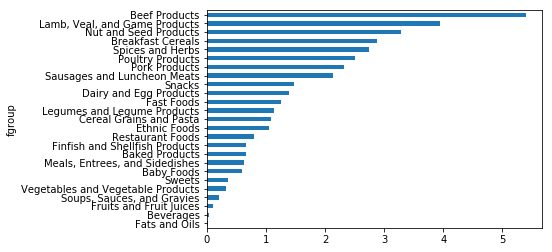

In [61]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

이번에는 각 영양소가 어떤 음식에 가장 많이 들어있는 지 찾아보자.

DataFrame.xs(key, axis=0, level=None, drop_level=True): key로 지명된 index label 해당하는 rows(axis=0), 또는 columns(axis=1)
- key : object. index에 포함된 label 또는 다중색인에서의 subset
- axis : int, default 0
- level : object, defaults to first n levels (n=1 or len(key))
    - 다중색인에서 key가 어떤 level에 속하는 지를 지정(level의 label이나 위치(0부터) 지정)
- drop_level : boolean, default True. key가 속한 level이 삭제된다.

```sh
>>> df
                    A  B  C  D
first second third
bar   one    1      4  1  8  9
      two    1      7  5  5  0
baz   one    1      6  6  8  0
      three  2      5  3  5  3
>>> df.xs(('baz', 'three'))
       A  B  C  D
third
2      5  3  5  3
>>> df.xs('one', level=1)
             A  B  C  D
first third
bar   1      4  1  8  9
baz   1      6  6  8  0
>>> df.xs(('baz', 2), level=[0, 'third'])
        A  B  C  D
second
three   5  3  5  3
```

In [72]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

In [73]:
for _, grouped in by_nutrient: break

In [74]:
grouped

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
48,Alanine,Amino Acids,g,0.711,1008,"Cheese, caraway",Dairy and Egg Products,
127,Alanine,Amino Acids,g,0.703,1009,"Cheese, cheddar",Dairy and Egg Products,
198,Alanine,Amino Acids,g,0.764,1018,"Cheese, edam",Dairy and Egg Products,
269,Alanine,Amino Acids,g,0.639,1019,"Cheese, feta",Dairy and Egg Products,
340,Alanine,Amino Acids,g,0.741,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,
416,Alanine,Amino Acids,g,0.828,1029,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,
487,Alanine,Amino Acids,g,0.932,1038,"Cheese, romano",Dairy and Egg Products,
541,Alanine,Amino Acids,g,0.969,1039,"Cheese, roquefort",Dairy and Egg Products,
613,Alanine,Amino Acids,g,0.602,1048,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,
686,Alanine,Amino Acids,g,0.102,1049,"Cream, fluid, half and half",Dairy and Egg Products,


In [75]:
grouped.value.idxmax()

202227

In [70]:
grouped.loc[grouped.value.idxmax()][['value', 'food']]

nutrient                                  Alanine
nutgroup                              Amino Acids
units                                           g
value                                       8.009
id                                          19177
food            Gelatins, dry powder, unsweetened
fgroup                                     Sweets
manufacturer                                     
Name: 202227, dtype: object

In [76]:
# 같은내용 어렵게 구현
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]
max_foods

value  \
nutgroup    nutrient                                     
Amino Acids Alanine                              8.009   
            Arginine                             7.436   
            Aspartic acid                       10.203   
            Cystine                              1.307   
            Glutamic acid                       17.452   
            Glycine                             19.049   
            Histidine                            2.999   
            Hydroxyproline                       0.803   
            Isoleucine                           4.300   
            Leucine                              7.200   
            Lysine                               6.690   
            Methionine                           1.859   
            Phenylalanine                        4.600   
            Proline                             12.295   
            Serine                               4.600   
            Threonine                            3.300   
            Tryptophan                           1.600   
            Tyrosine                             3.300   
            Valine                               4.500   
Composition Adjusted Protein                    12.900   
            Carbohydrate, by difference        100.000   
            Fiber, total dietary                79.000   
            Protein                             88.320   
            Sugars, total                       99.800   
            Total lipid (fat)                  100.000   
            Water                              100.000   
Elements    Calcium, Ca                       7364.000   
            Copper, Cu                          15.050   
            Fluoride, F                        584.000   
            Iron, Fe                            87.470   
...                                                ...   
Vitamins    Cryptoxanthin, beta               6186.000   
            Dihydrophylloquinone               103.800   
            Folate, DFE                       2630.000   
            Folate, food                      2340.000   
            Folate, total                     2340.000   
            Folic acid                        1538.000   
            Lutein + zeaxanthin              39550.000   
            Lycopene                         46260.000   
            Menaquinone-4                       33.200   
            Niacin                              97.000   
            Pantothenic acid                    35.000   
            Retinol                          30000.000   
            Riboflavin                          14.300   
            Thiamin                             20.000   
            Tocopherol, beta                     6.490   
            Tocopherol, delta                   30.880   
            Tocopherol, gamma                  100.880   
            Vitamin A, IU                   100000.000   
            Vitamin A, RAE                   30000.000   
            Vitamin B-12                        98.890   
            Vitamin B-12, added                 24.000   
            Vitamin B-6                         12.000   
            Vitamin C, total ascorbic acid    2400.000   
            Vitamin D                        10000.000   
            Vitamin D (D2 + D3)                250.000   
            Vitamin D2 (ergocalciferol)         28.100   
            Vitamin D3 (cholecalciferol)        27.400   
            Vitamin E (alpha-tocopherol)       149.400   
            Vitamin E, added                    46.550   
            Vitamin K (phylloquinone)         1714.500   

                                                                                         food  
nutgroup    nutrient                                                                           
Amino Acids Alanine                                         Gelatins, dry powder, unsweetened  
            Arginine                                             Seeds, sesame flour, low-fat  
          

In [67]:
# make the food a little smaller
max_foods.food = max_foods.food.str[:50]
max_foods.ix['Amino Acids']

C:\Users\JMLAP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,value,food
nutrient,,
Alanine,8.009,"Gelatins, dry powder, unsweetened"
Arginine,7.436,"Seeds, sesame flour, low-fat"
Aspartic acid,10.203,Soy protein isolate
Cystine,1.307,"Seeds, cottonseed flour, low fat (glandless)"
Glutamic acid,17.452,Soy protein isolate
Glycine,19.049,"Gelatins, dry powder, unsweetened"
Histidine,2.999,"Whale, beluga, meat, dried (Alaska Native)"
Hydroxyproline,0.803,"KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA..."
Isoleucine,4.300,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE..."


In [71]:
# max_foods.ix['Amino Acids']['food']
max_foods.ix['Amino Acids','food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

#### 참고: 시계열 Series 간의 변환
timestampindex된 Series.to_period()와 periodindex된 Series.to_timestamp():
- pandas data 객체의 time index간 변환을 위한 메소드
- by http://pandas.pydata.org/pandas-docs/stable/10min.html

```sh
In [117]: rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [118]: ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [119]: ts
Out[119]: 
2012-01-31   -1.134623
2012-02-29   -1.561819
2012-03-31   -0.260838
2012-04-30    0.281957
2012-05-31    1.523962
Freq: M, dtype: float64

In [120]: ps = ts.to_period()

In [121]: ps
Out[121]: 
2012-01   -1.134623
2012-02   -1.561819
2012-03   -0.260838
2012-04    0.281957
2012-05    1.523962
Freq: M, dtype: float64

In [122]: ps.to_timestamp()
Out[122]: 
2012-01-01   -1.134623
2012-02-01   -1.561819
2012-03-01   -0.260838
2012-04-01    0.281957
2012-05-01    1.523962
Freq: MS, dtype: float64
```